In [50]:
import os
import pathlib

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import src.utils.time
import src.utils.dict
import src.utils.comps
import src.utils.module
import src.utils.json

import src.comps.heads_pyramid_2

In [51]:
tab20_color_list =\
    [mpl.colormaps["tab20"](x) for x in (np.linspace(0, 1-1/20, 20) + 1/(2*20))[0::2]] +\
    [mpl.colormaps["tab20"](x) for x in (np.linspace(0, 1-1/20, 20) + 1/(2*20))[1::2]]

---

In [52]:
data_df = pd.DataFrame({
    "backbone": pd.Series(dtype="str"),
    "exp_name": pd.Series(dtype="str"),
    "mean_train_avg_prec": pd.Series(dtype="float"),
    "mean_val_avg_prec": pd.Series(dtype="float"),
    "mean_test_avg_prec": pd.Series(dtype="float"),
    "avg_train_acc_at_1": pd.Series(dtype="float"),
    "avg_val_acc_at_1": pd.Series(dtype="float"),
    "avg_test_acc_at_1": pd.Series(dtype="float"),
    "avg_train_acc_at_10": pd.Series(dtype="float"),
    "avg_val_acc_at_10": pd.Series(dtype="float"),
    "avg_test_acc_at_10": pd.Series(dtype="float"),
    "avg_train_acc_at_20": pd.Series(dtype="float"),
    "avg_val_acc_at_20": pd.Series(dtype="float"),
    "avg_test_acc_at_20": pd.Series(dtype="float"),
    "avg_train_acc_at_50": pd.Series(dtype="float"),
    "avg_val_acc_at_50": pd.Series(dtype="float"),
    "avg_test_acc_at_50": pd.Series(dtype="float")
})

In [53]:
# SOTA

row = {}
row["exp_name"] = "-"
row["backbone"] = "Current SOTA"

row["mean_train_avg_prec"] = 0
row["mean_val_avg_prec"] = 0
row["mean_test_avg_prec"] = 0.492

row["avg_train_acc_at_1"] = 0
row["avg_val_acc_at_1"] = 0
row["avg_test_acc_at_1"] = 0.373

row["avg_train_acc_at_10"] = 0
row["avg_val_acc_at_10"] = 0
row["avg_test_acc_at_10"] = 0.712

row["avg_train_acc_at_20"] = 0
row["avg_val_acc_at_20"] = 0
row["avg_test_acc_at_20"] = 0.777

row["avg_train_acc_at_50"] = 0
row["avg_val_acc_at_50"] = 0
row["avg_test_acc_at_50"] = 0.850

data_df.loc[len(data_df)] = row

In [54]:
# ret_train/resnet_50

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", "ret_train", "resnet_50")

#for exp_name in ["test_{:03d}".format(idx) for idx in range(9)]:
for exp_name in ["test_{:03d}".format(idx) for idx in [6]]:

    row = {}
    row["exp_name"] = exp_name

    #

    exp_filename = os.path.join(exp_dirname, exp_name, "exp_data_corr.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    row["backbone"] = exp_data["settings"]["backbone"]["class"]

    #

    metrics_filename = os.path.join(exp_dirname, exp_name, "eval_ctsrbm_metrics_2__data.json")
    if os.path.exists(metrics_filename):
    
        metrics_data = src.utils.json.load_json_dict(metrics_filename)
        
        row["mean_train_avg_prec"] = metrics_data["results"]["train"]["mean_avg_prec"]
        row["mean_val_avg_prec"] = metrics_data["results"]["val"]["mean_avg_prec"]
        row["mean_test_avg_prec"] = metrics_data["results"]["test"]["mean_avg_prec"]

        for num in [1, 10, 20, 50]:
            row["avg_train_acc_at_{:d}".format(num)] = metrics_data["results"]["train"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_val_acc_at_{:d}".format(num)] = metrics_data["results"]["val"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_test_acc_at_{:d}".format(num)] = metrics_data["results"]["test"]["avg_acc_at_k_dict"]["{:d}".format(num)]
        
    #

    data_df.loc[len(data_df)] = row

In [55]:
# ret_train/convnext_t

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", "ret_train", "convnext_t")

#for exp_name in ["test_{:03d}".format(idx) for idx in range(9)]:
for exp_name in ["test_{:03d}".format(idx) for idx in [2]]:

    row = {}
    row["exp_name"] = exp_name

    #

    exp_filename = os.path.join(exp_dirname, exp_name, "exp_data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    row["backbone"] = exp_data["settings"]["backbone"]["class"]

    #

    metrics_filename = os.path.join(exp_dirname, exp_name, "eval_ctsrbm_metrics_2__data.json")
    if os.path.exists(metrics_filename):
    
        metrics_data = src.utils.json.load_json_dict(metrics_filename)
        
        row["mean_train_avg_prec"] = metrics_data["results"]["train"]["mean_avg_prec"]
        row["mean_val_avg_prec"] = metrics_data["results"]["val"]["mean_avg_prec"]
        row["mean_test_avg_prec"] = metrics_data["results"]["test"]["mean_avg_prec"]

        for num in [1, 10, 20, 50]:
            row["avg_train_acc_at_{:d}".format(num)] = metrics_data["results"]["train"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_val_acc_at_{:d}".format(num)] = metrics_data["results"]["val"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_test_acc_at_{:d}".format(num)] = metrics_data["results"]["test"]["avg_acc_at_k_dict"]["{:d}".format(num)]
        
    #

    data_df.loc[len(data_df)] = row

In [56]:
# ret_train_DDP_2/swint_v2_t_s2

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", "ret_train_DDP_2", "swint_v2_t_s2")

#for exp_name in ["run_{:03d}".format(idx) for idx in range(12)]:
for exp_name in ["run_{:03d}".format(idx) for idx in [2]]:

    row = {}
    row["exp_name"] = exp_name

    #

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_2__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    row["backbone"] = exp_data["settings"]["backbone"]["class"]

    #
    
    metrics_filename = os.path.join(exp_dirname, exp_name, "eval_ctsrbm_metrics_2__data.json")
    if os.path.exists(metrics_filename):
    
        metrics_data = src.utils.json.load_json_dict(metrics_filename)
        
        row["mean_train_avg_prec"] = metrics_data["results"]["train"]["mean_avg_prec"]
        row["mean_val_avg_prec"] = metrics_data["results"]["val"]["mean_avg_prec"]
        row["mean_test_avg_prec"] = metrics_data["results"]["test"]["mean_avg_prec"]

        for num in [1, 10, 20, 50]:
            row["avg_train_acc_at_{:d}".format(num)] = metrics_data["results"]["train"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_val_acc_at_{:d}".format(num)] = metrics_data["results"]["val"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_test_acc_at_{:d}".format(num)] = metrics_data["results"]["test"]["avg_acc_at_k_dict"]["{:d}".format(num)]

    #

    data_df.loc[len(data_df)] = row

In [57]:
# ret_train_pyr_2/convnext_t_s2

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", "ret_train_pyr_2", "convnext_t_s2")
for exp_name in ["exp_{:03d}".format(idx) for idx in [3, 6]]:

    row = {}
    row["exp_name"] = exp_name

    #

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_2__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    row["backbone"] = exp_data["settings"]["backbone"]["class"]

    #

    metrics_filename = os.path.join(exp_dirname, exp_name, "eval_ctsrbm_metrics_2__data.json")
    if os.path.exists(metrics_filename):
    
        metrics_data = src.utils.json.load_json_dict(metrics_filename)
        
        row["mean_train_avg_prec"] = metrics_data["results"]["train"]["mean_avg_prec"]
        row["mean_val_avg_prec"] = metrics_data["results"]["val"]["mean_avg_prec"]
        row["mean_test_avg_prec"] = metrics_data["results"]["test"]["mean_avg_prec"]

        for num in [1, 10, 20, 50]:
            row["avg_train_acc_at_{:d}".format(num)] = metrics_data["results"]["train"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_val_acc_at_{:d}".format(num)] = metrics_data["results"]["val"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_test_acc_at_{:d}".format(num)] = metrics_data["results"]["test"]["avg_acc_at_k_dict"]["{:d}".format(num)]

    #

    data_df.loc[len(data_df)] = row

In [58]:
# ret_train_old_smpl/convnext_t_s2

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", "ret_train_old_smpl", "convnext_t_s2")
for exp_name in ["exp_{:03d}".format(idx) for idx in [0, 6]]:

    row = {}
    row["exp_name"] = exp_name

    #

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_2__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    row["backbone"] = exp_data["settings"]["backbone"]["class"] + " (Old Neg. Smpl.)"

    #

    metrics_filename = os.path.join(exp_dirname, exp_name, "eval_ctsrbm_metrics_2__data.json")
    if os.path.exists(metrics_filename):
    
        metrics_data = src.utils.json.load_json_dict(metrics_filename)
        
        row["mean_train_avg_prec"] = metrics_data["results"]["train"]["mean_avg_prec"]
        row["mean_val_avg_prec"] = metrics_data["results"]["val"]["mean_avg_prec"]
        row["mean_test_avg_prec"] = metrics_data["results"]["test"]["mean_avg_prec"]

        for num in [1, 10, 20, 50]:
            row["avg_train_acc_at_{:d}".format(num)] = metrics_data["results"]["train"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_val_acc_at_{:d}".format(num)] = metrics_data["results"]["val"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_test_acc_at_{:d}".format(num)] = metrics_data["results"]["test"]["avg_acc_at_k_dict"]["{:d}".format(num)]

    #

    data_df.loc[len(data_df)] = row

In [59]:
# ret_train_old_smpl/swint_v2_t_s2

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", "ret_train_old_smpl", "swint_v2_t_s2")
for exp_name in ["run_{:03d}".format(idx) for idx in [2]]:

    row = {}
    row["exp_name"] = exp_name

    #

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_2__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    row["backbone"] = exp_data["settings"]["backbone"]["class"] + " (Old Neg. Smpl.)"

    #

    metrics_filename = os.path.join(exp_dirname, exp_name, "eval_ctsrbm_metrics_2__data.json")
    if os.path.exists(metrics_filename):
    
        metrics_data = src.utils.json.load_json_dict(metrics_filename)
        
        row["mean_train_avg_prec"] = metrics_data["results"]["train"]["mean_avg_prec"]
        row["mean_val_avg_prec"] = metrics_data["results"]["val"]["mean_avg_prec"]
        row["mean_test_avg_prec"] = metrics_data["results"]["test"]["mean_avg_prec"]

        for num in [1, 10, 20, 50]:
            row["avg_train_acc_at_{:d}".format(num)] = metrics_data["results"]["train"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_val_acc_at_{:d}".format(num)] = metrics_data["results"]["val"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_test_acc_at_{:d}".format(num)] = metrics_data["results"]["test"]["avg_acc_at_k_dict"]["{:d}".format(num)]

    #

    data_df.loc[len(data_df)] = row

In [60]:
# ret_train_old_smpl_2/convnext_t_s2

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", "ret_train_old_smpl_2", "convnext_t_s2")
for exp_name in ["glam_000_exp_007"]:

    row = {}
    row["exp_name"] = exp_name

    #

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_2__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    row["backbone"] = exp_data["settings"]["backbone"]["class"] + " + GLAM (Old Neg. Smpl.)"

    #

    metrics_filename = os.path.join(exp_dirname, exp_name, "eval_ctsrbm_metrics_2__data.json")
    if os.path.exists(metrics_filename):
    
        metrics_data = src.utils.json.load_json_dict(metrics_filename)
        
        row["mean_train_avg_prec"] = metrics_data["results"]["train"]["mean_avg_prec"]
        row["mean_val_avg_prec"] = metrics_data["results"]["val"]["mean_avg_prec"]
        row["mean_test_avg_prec"] = metrics_data["results"]["test"]["mean_avg_prec"]

        for num in [1, 10, 20, 50]:
            row["avg_train_acc_at_{:d}".format(num)] = metrics_data["results"]["train"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_val_acc_at_{:d}".format(num)] = metrics_data["results"]["val"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_test_acc_at_{:d}".format(num)] = metrics_data["results"]["test"]["avg_acc_at_k_dict"]["{:d}".format(num)]

    #

    data_df.loc[len(data_df)] = row

In [61]:
data_df

,backbone,exp_name,mean_train_avg_prec,mean_val_avg_prec,mean_test_avg_prec,avg_train_acc_at_1,avg_val_acc_at_1,avg_test_acc_at_1,avg_train_acc_at_10,avg_val_acc_at_10,avg_test_acc_at_10,avg_train_acc_at_20,avg_val_acc_at_20,avg_test_acc_at_20,avg_train_acc_at_50,avg_val_acc_at_50,avg_test_acc_at_50
0,Current SOTA,-,0.000000,0.000000,0.492000,0.000000,0.000000,0.373000,0.000000,0.000000,0.712000,0.000000,0.000000,0.777000,0.000000,0.000000,0.850000
1,ResNet50Backbone,test_006,0.066261,0.085426,0.084795,0.052880,0.068209,0.068558,0.148629,0.181074,0.188493,0.195990,0.235889,0.243222,0.276068,0.329239,0.337290
2,ConvNeXtTinyBackbone,test_002,0.093334,0.116260,0.116985,0.071301,0.091454,0.091053,0.208484,0.248707,0.257263,0.272616,0.324520,0.331049,0.378406,0.442702,0.450099
3,SwinTransformerV2TinyBackbone,run_002,0.090288,0.113518,0.115866,0.074610,0.093494,0.098010,0.197395,0.235498,0.240861,0.249837,0.298411,0.301092,0.336992,0.397078,0.401294
4,ConvNeXtTinyPyramidBackbone,exp_003,0.064735,0.082452,0.081083,0.051037,0.063511,0.062782,0.143782,0.179137,0.183729,0.191713,0.236116,0.243454,0.274439,0.336266,0.344057
5,ConvNeXtTinyPyramidBackbone,exp_006,0.065548,0.083275,0.082683,0.051342,0.064150,0.064194,0.146012,0.180724,0.184867,0.193801,0.239022,0.245921,0.276282,0.338698,0.343741
6,ConvNeXtTinyPyramidBackbone (Old Neg. Smpl.),exp_000,0.110746,0.137988,0.138124,0.086208,0.111732,0.110554,0.244858,0.291734,0.296053,0.315445,0.368001,0.373213,0.429290,0.488882,0.496606
7,ConvNeXtTinyPyramidBackbone (Old Neg. Smpl.),exp_006,0.111118,0.138224,0.139591,0.086330,0.111629,0.112978,0.246446,0.292208,0.296812,0.317197,0.369774,0.373740,0.430716,0.492571,0.497512
8,SwinTransformerV2TinyBackbone (Old Neg. Smpl.),run_002,0.139656,0.172719,0.173148,0.113010,0.145671,0.144896,0.304458,0.358357,0.362483,0.383304,0.441919,0.442657,0.501517,0.565706,0.566661
9,ConvNeXtTinyBackbone + GLAM (Old Neg. Smpl.),glam_000_exp_007,0.142920,0.176882,0.176179,0.119965,0.152843,0.152106,0.295711,0.348054,0.349285,0.363295,0.420694,0.424316,0.466987,0.531024,0.535312


---

In [68]:
def plot_metrics(
    metric_train_name,
    metric_val_name,
    metric_test_name,
):

    backbone_list = [
        #"Current SOTA",
        #"ResNet50Backbone",
        #"ConvNeXtTinyBackbone",
        "ConvNeXtTinyPyramidBackbone",
        "SwinTransformerV2TinyBackbone",
        "ConvNeXtTinyPyramidBackbone (Old Neg. Smpl.)",
        "SwinTransformerV2TinyBackbone (Old Neg. Smpl.)",
        #"ConvNeXtTinyBackbone + GLAM (Old Neg. Smpl.)",
    ]

    ord_df = data_df.copy()
    ord_df = ord_df[ord_df["backbone"].isin(backbone_list)]
    ord_df = ord_df[~(pd.isna(ord_df[metric_test_name]))]
    ord_df = ord_df.sort_values(metric_test_name, ascending=True)
    ord_df = ord_df.reset_index(drop=True)

    ###

    plt.figure(figsize=(8, 6))

    ###

    bar_width = 0.8

    for backbone in backbone_list:

        ord_df_filt = ord_df[ord_df["backbone"] == backbone].copy()

        if backbone == "Current SOTA": backbone_color = "black"
        if backbone == "ResNet50Backbone": backbone_color = tab20_color_list[0]
        if backbone == "ConvNeXtTinyBackbone": backbone_color = tab20_color_list[1]
        if backbone == "ConvNeXtTinyPyramidBackbone": backbone_color = tab20_color_list[2]
        if backbone == "SwinTransformerV2TinyBackbone": backbone_color = tab20_color_list[3]
        if backbone == "ConvNeXtTinyPyramidBackbone (Old Neg. Smpl.)": backbone_color= tab20_color_list[4]
        if backbone == "SwinTransformerV2TinyBackbone (Old Neg. Smpl.)": backbone_color= tab20_color_list[5]
        if backbone == "ConvNeXtTinyBackbone + GLAM (Old Neg. Smpl.)": backbone_color= tab20_color_list[6]
        
        plt.bar(np.asarray(ord_df_filt.index) - bar_width/3, ord_df_filt[metric_train_name], color=backbone_color, alpha=0.5, width=bar_width/3)
        plt.bar(np.asarray(ord_df_filt.index), ord_df_filt[metric_val_name], color=backbone_color, alpha=0.6, width=bar_width/3)
        plt.bar(np.asarray(ord_df_filt.index) + bar_width/3, ord_df_filt[metric_test_name], color=backbone_color, alpha=1, width=bar_width/3, label=backbone)

    plt.legend()

    ###

    plt.xticks([])
    plt.title("{:s} / {:s} / {:s}".format(
        metric_train_name,
        metric_val_name,
        metric_test_name
    ))

    ###

    text_height = - plt.ylim()[1] * 0.060

    plt.text(-1, text_height, "Run", ha="center")

    for backbone in ord_df["backbone"].unique():

        ord_df_filt = ord_df[ord_df["backbone"] == backbone]

        for idx in ord_df_filt.index:
            text = "{:s}".format(
                ord_df_filt.at[idx, "exp_name"][-3:]
            )
            plt.text(idx, text_height, text, ha="center", family="monospace")
            
    ###

    plt.grid(True)
    plt.show()

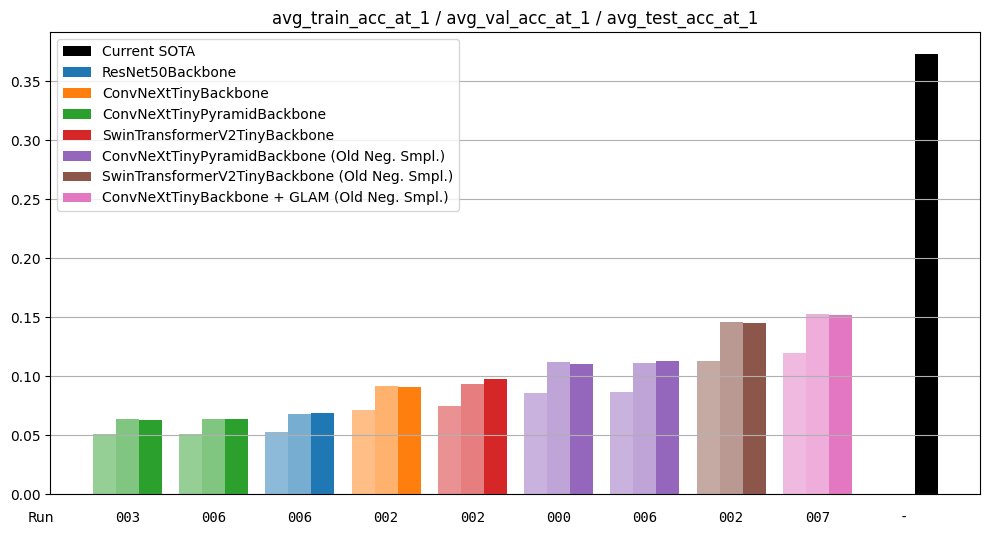

In [45]:
plot_metrics(
    "avg_train_acc_at_1",
    "avg_val_acc_at_1",
    "avg_test_acc_at_1",
)

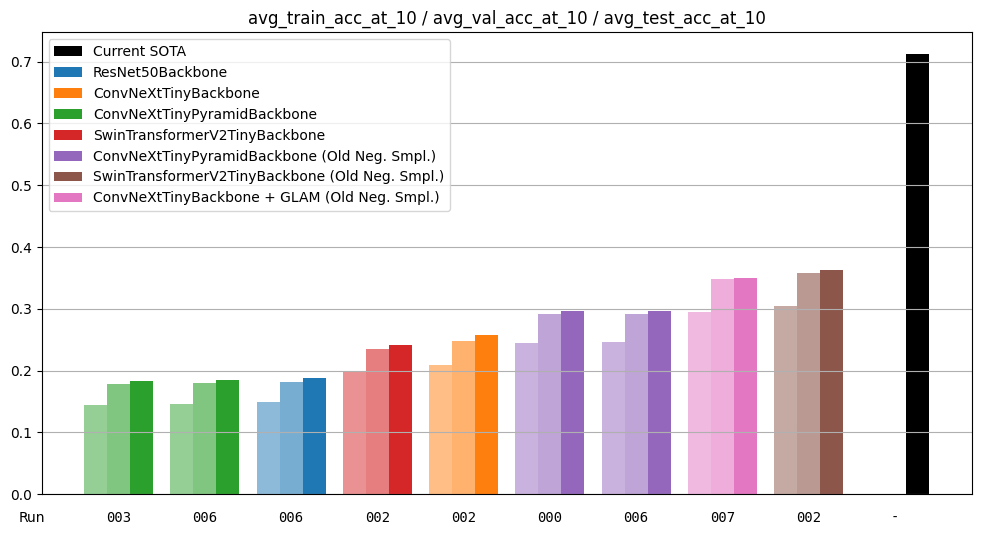

In [46]:
plot_metrics(
    "avg_train_acc_at_10",
    "avg_val_acc_at_10",
    "avg_test_acc_at_10",
)

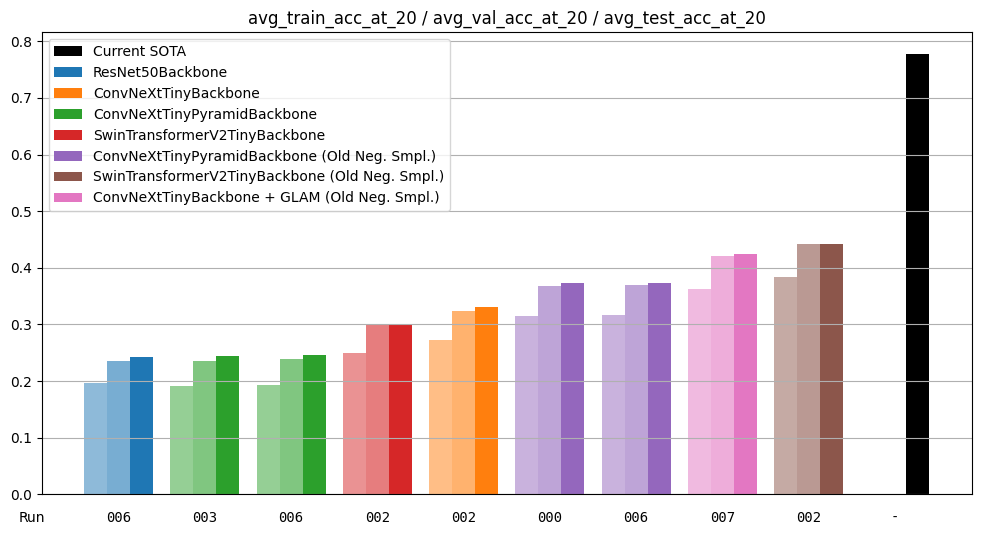

In [47]:
plot_metrics(
    "avg_train_acc_at_20",
    "avg_val_acc_at_20",
    "avg_test_acc_at_20",
)

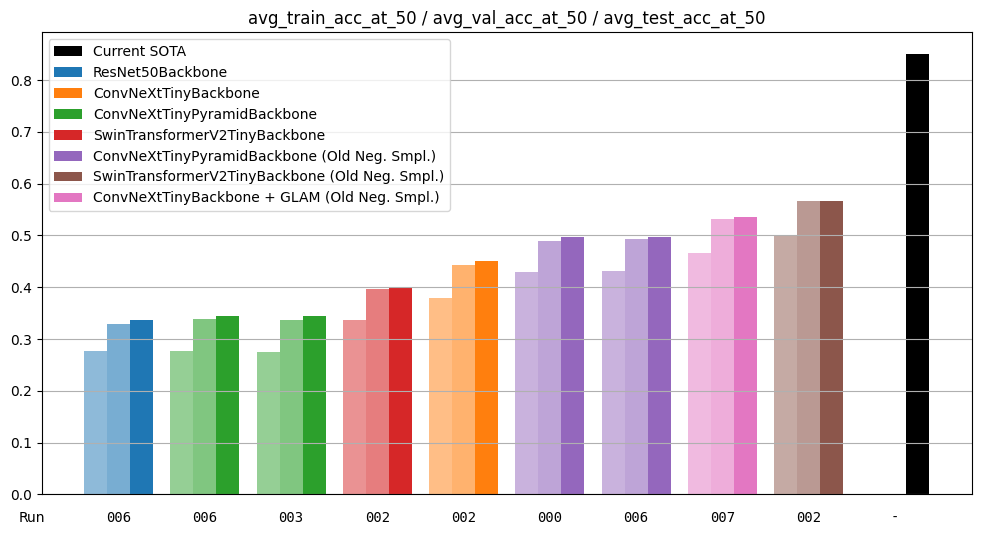

In [48]:
plot_metrics(
    "avg_train_acc_at_50",
    "avg_val_acc_at_50",
    "avg_test_acc_at_50",
)

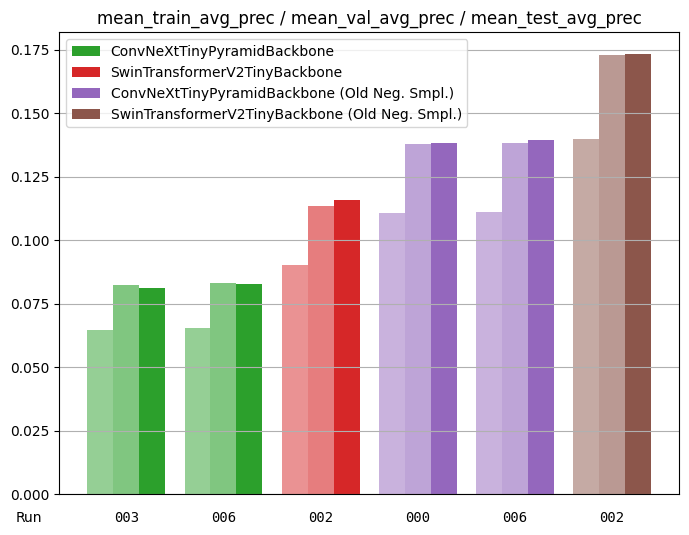

In [69]:
plot_metrics(
    "mean_train_avg_prec",
    "mean_val_avg_prec",
    "mean_test_avg_prec",
)